-------
# <font color='green'> Sentiment Analysis on IMDb Movie Reviews.
-------

### <font color = 'blue'> **Domain:** </font> Entertainment

### <font color = 'blue'> **Context and Content:**
The IMDb dataset is a collection of 50,000 reviews from the Internet Movie Database (IMDb). The reviews are labeled as either positive or negative and are split into two sets of 25,000 reviews for training and testing. Each set contains an equal number of positive and negative reviews.

### <font color = 'blue'> **Learning Outcome:**
Sentiment Analysis using NLP and Logistic Regression.

### <font color = 'blue'> **Objective:**
To develop a sentiment analysis model capable of classifying IMDb movie reviews into positive or negative sentiments using and NLP technique and Logidtic Regression algorithm.

### <font color = 'blue'> **Dataset Description:**

- **IMDb Dataset:**
The IMDb dataset is a binary sentiment analysis dataset for natural language processing or text analytics.
- **Context and Content:**
The IMDb dataset is a collection of 50,000 reviews from the Internet Movie Database (IMDb). The reviews are labeled as either positive or negative and are split into two sets of 25,000 reviews for training and testing. Each set contains an equal number of positive and negative reviews.
- #### Dataset link: https://www.kaggle.com/datasets/bhavikjikadara/imdb-dataset-sentiment-analysis

### <font color = 'blue'> **Attribute Information:**
- **Review:**  Reviews or comments about certain movies .
- **Sentiment:**  Classification the sentiment of the review into either "positive" or "negative".

### <font color='brown'> Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

### <font color='brown'> Load the dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\Parthi\Downloads\IMDB_dataset.csv\IMDB_dataset.csv")
df = dataset.sample(8000).dropna()

### <font color='brown'> Text Pre-processing

In [3]:
lm = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def transform_data(review):
    review = review.lower()
    review = re.sub('<.*?>', ' ', review)
    review = "".join([x for x in review if x not in string.punctuation])
    review = review.split()
    review = [lm.lemmatize(x) for x in review if x not in stop_words]
    return " ".join(review)

df['t_rev'] = df['review'].apply(transform_data)

### <font color='brown'> Data Visualization

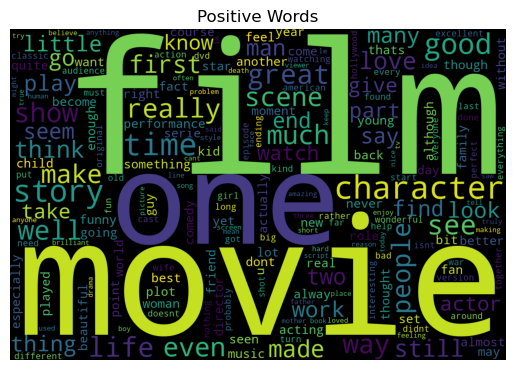

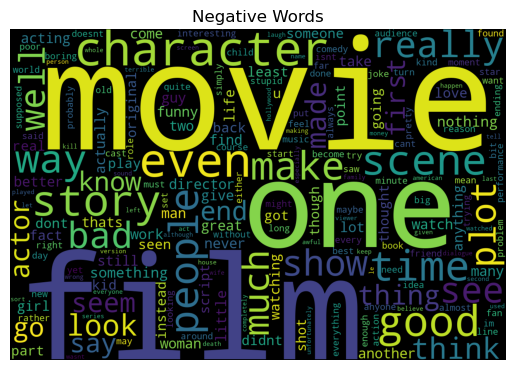

In [4]:
positive_words = df[df['sentiment'] == 'positive']['t_rev'].str.cat(sep=' ')
negative_words = df[df['sentiment'] == 'negative']['t_rev'].str.cat(sep=' ')

def plot_wordcloud(words, title):
    wc = WordCloud(height=800, width=1200).generate(words)
    plt.imshow(wc)
    plt.title(title)
    plt.axis("off")
    plt.show()

plot_wordcloud(positive_words, "Positive Words")
plot_wordcloud(negative_words, "Negative Words")

### <font color='brown'> Encoding and Vectorizing

In [5]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['t_rev']).toarray()
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

### <font color='brown'> Splitting the dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### <font color='brown'> Training the Logistic Regression model on the Training set

In [7]:
lr = LogisticRegression(C=10, penalty='l2', solver='saga', max_iter=500)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

### <font color='brown'> Model Evaluation

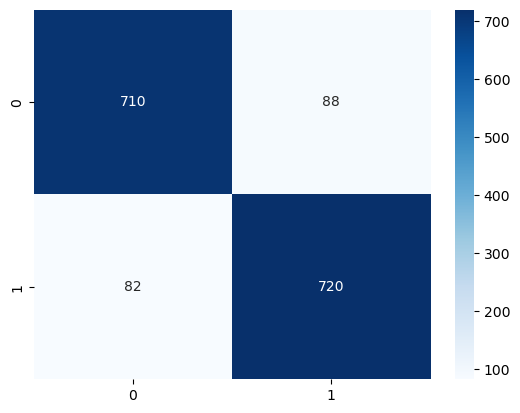

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       798
           1       0.89      0.90      0.89       802

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.show()

print(classification_report(y_test, y_pred))